In [8]:
import io
import os
import requests
import datetime
import warnings
import winsound
import itertools
import matplotlib
import statistics 
import talib as ta
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from pylab import rcParams
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import mixture as mix
from colorama import Fore, Back, Style 
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
print('TimeFrames : H1, H4, D1, W1, MN')
timeframe01=input('Enter The TimeFrame :',)
timeframe1=str(timeframe01).upper()
direction1=str("C:\\Users\\maryam\\AppData\\Roaming\\MetaQuotes\\Terminal\\287469DEA9630EA94D0715D755974F1B\\MQL4\\Files\\TF-"+timeframe1)
currencies0 = os.listdir(direction1)    
currencies = list(filter(lambda f: f.endswith('.csv'), currencies0))
numcurrencies=len(currencies)
print(Fore.BLACK +'---------------------------List of All Currencies----------------------------')
print(Fore.BLACK +'The Number of Total Currencies is :'+' ' ,numcurrencies)
currencies

TimeFrames : H1, H4, D1, W1, MN
Enter The TimeFrame :d1
---------------------------List of All Currencies----------------------------
The Number of Total Currencies is :  8


['AUDJPY,D1.csv',
 'BTCUSD,D1.csv',
 'ETHUSD,D1.csv',
 'EURUSD,D1.csv',
 'GBPUSD,D1.csv',
 'NZDUSD,D1.csv',
 'USDCAD,D1.csv',
 'XAUUSD,D1.csv']

In [9]:
#DIRECTION AND SELECT CURRENCY-------------------------------------------------------------------------------------------
namestart0=input('Whats The Name of Currency ? ').upper()
namestart1=namestart0+(',')+timeframe1+('.csv')
def find_files(filename, search_path):
    result = []

    for root, dir, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))
    return result
filepath1=find_files(namestart1,direction1)
print('------------------------The file'+' '+namestart1+' '+'is in this directory---------------------')
print(filepath1[0])

Whats The Name of Currency ? usdcad
------------------------The file USDCAD,D1.csv is in this directory---------------------
C:\Users\maryam\AppData\Roaming\MetaQuotes\Terminal\287469DEA9630EA94D0715D755974F1B\MQL4\Files\TF-D1\USDCAD,D1.csv


In [10]:
indice0Close=pd.read_csv(filepath1[0],usecols=[2,3,4,5])
daynumber=indice0Close.shape[0]
#DEFINE START-------------------------------------------------------------------------------------------
print(Fore.BLACK +'Days of total data :',indice0Close.shape[0])
start0test=input('Enter the start date for choose the Currency : ')
starttest=int(start0test)
#-------------------------------------------------------------------------------------------------------
dataset=pd.DataFrame(data=indice0Close.values[starttest:daynumber,:],columns=['Open','High','Low','Close'])
dataset

Days of total data : 2048
Enter the start date for choose the Currency : 1000


,Open,High,Low,Close
0,1.34383,1.35156,1.34233,1.34865
1,1.34870,1.35344,1.34755,1.34854
2,1.34858,1.35335,1.34527,1.35164
3,1.34996,1.35361,1.33956,1.34108
4,1.34108,1.34801,1.33991,1.34302
...,...,...,...,...
1043,1.29984,1.30059,1.29270,1.29322
1044,1.29332,1.29577,1.29091,1.29155
1045,1.29157,1.29403,1.28509,1.28602
1046,1.28602,1.28729,1.27715,1.27834


# MACHINE LEARNING 
Who cares about behind the codes

In [11]:
n=10
t=0.8
split=int(t*len(dataset))
dataset['high']=dataset['High'].shift(1)
dataset['low']=dataset['Low'].shift(1)
dataset['close']=dataset['Close'].shift(1)
#Indicators--------------------------------------------------------------------------------
dataset['RSI']=ta.RSI(np.array(dataset['close']),timeperiod=n)
dataset['SMA']=dataset['close'].rolling(window=n).mean()
dataset['Corr']=dataset['SMA'].rolling(window=n).corr(dataset['close'])
dataset['SAR']=ta.SAR(np.array(dataset['high']),np.array(dataset['low']),0.2,0.2)
dataset['ADX']=ta.ADX(np.array(dataset['high']),np.array(dataset['low']),np.array(dataset['close']),timeperiod=n)
dataset['Corr'][dataset.Corr>1]=1
dataset['Corr'][dataset.Corr<-1]=-1
dataset['Returns']=np.log(((dataset['Open'])/(dataset['Open'].shift(1))).astype('float64'))
dataset0=dataset.dropna()
dataset0

,Open,High,Low,Close,high,low,close,RSI,SMA,Corr,SAR,ADX,Returns
20,1.33672,1.34264,1.33568,1.34110,1.34332,1.33591,1.33672,51.757920,1.325858,-0.413367,1.320210,45.361269,-0.002921
21,1.34109,1.35193,1.34100,1.34812,1.34264,1.33568,1.34110,56.585789,1.327638,-0.383493,1.324832,43.265542,0.003264
22,1.34811,1.35561,1.34789,1.35312,1.35193,1.34100,1.34812,63.152629,1.330560,0.082311,1.328530,43.063813,0.005221
23,1.35060,1.35214,1.34687,1.35056,1.35561,1.34789,1.35312,67.091915,1.334105,0.572821,1.333210,43.406983,0.001845
24,1.35045,1.35789,1.35014,1.35732,1.35214,1.34687,1.35056,63.245400,1.337867,0.760607,1.337690,43.323677,-0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1.29984,1.30059,1.29270,1.29322,1.30088,1.29225,1.30037,38.532806,1.304428,0.537045,1.304932,20.194004,0.000162
1044,1.29332,1.29577,1.29091,1.29155,1.30059,1.29270,1.29322,30.639156,1.302707,0.738517,1.302410,22.319359,-0.005029
1045,1.29157,1.29403,1.28509,1.28602,1.29577,1.29091,1.29155,29.092492,1.301060,0.838069,1.300880,24.641854,-0.001354
1046,1.28602,1.28729,1.27715,1.27834,1.29403,1.28509,1.28602,24.535482,1.298947,0.903582,1.300590,27.830843,-0.004306


In [12]:
ss=StandardScaler()
unsup=mix.GaussianMixture(n_components=4,covariance_type='spherical',n_init=100,random_state=42)
dataset1=dataset0.drop(['High','Low','Close'],axis=1)
unsup0=unsup.fit(np.reshape(ss.fit_transform(dataset1[:split]),(-1,dataset1.shape[1])))
regime=unsup0.predict(np.reshape(ss.fit_transform(dataset1[split:]),(-1,dataset1.shape[1])))
#Dataframe---------------------------------------------------------------------------------------
Regimes=pd.DataFrame(regime,columns=['Regime'],index=dataset1[split:].index)
Regimes0=Regimes.join(dataset1[split:],how='inner')
Regimes1=Regimes0.assign(market_cu_returns=dataset1[split:].Returns.cumsum())
Regimes2=Regimes1.reset_index(drop=False)
Regimes3=Regimes2.rename(columns={'index':'Date'})
Regimes3

,Date,Regime,Open,high,low,close,RSI,SMA,Corr,SAR,ADX,Returns,market_cu_returns
0,858,1,1.39974,1.40187,1.37295,1.39968,80.837193,1.365027,0.946515,1.369058,59.347044,0.019325,0.019325
1,859,1,1.42066,1.42754,1.39597,1.42059,85.222777,1.373254,0.960621,1.372950,61.361567,0.014835,0.034160
2,860,1,1.45091,1.46494,1.41657,1.45091,89.203646,1.384504,0.972287,1.372950,63.901694,0.021069,0.055229
3,861,1,1.45005,1.46668,1.44192,1.44990,88.322986,1.395393,0.971162,1.391348,66.211632,-0.000593,0.054636
4,862,1,1.43532,1.45341,1.41483,1.43327,74.810985,1.404506,0.926366,1.406414,63.850918,-0.010210,0.044426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1043,2,1.29984,1.30088,1.29225,1.30037,38.532806,1.304428,0.537045,1.304932,20.194004,0.000162,-0.054721
186,1044,2,1.29332,1.30059,1.29270,1.29322,30.639156,1.302707,0.738517,1.302410,22.319359,-0.005029,-0.059749
187,1045,2,1.29157,1.29577,1.29091,1.29155,29.092492,1.301060,0.838069,1.300880,24.641854,-0.001354,-0.061103
188,1046,2,1.28602,1.29403,1.28509,1.28602,24.535482,1.298947,0.903582,1.300590,27.830843,-0.004306,-0.065410


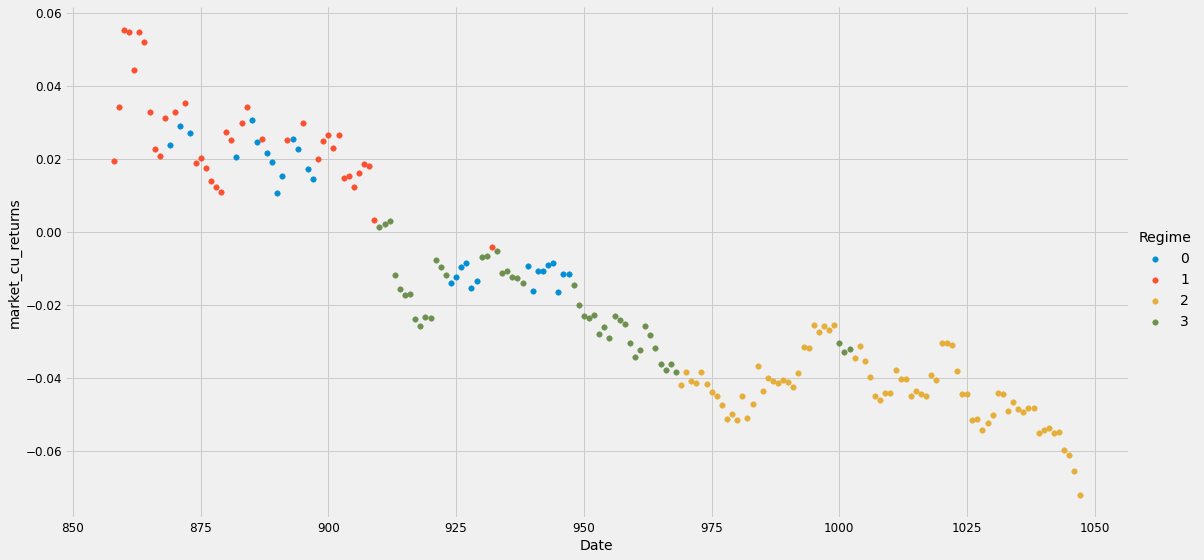

In [13]:
order=[0,1,2,3]
fig=sns.FacetGrid(data=Regimes3,hue='Regime',hue_order=order,aspect=2,height=8)
fig.map(plt.scatter,'Date','market_cu_returns',s=30).add_legend()
plt.show()

In [14]:
for i in order:
    print('Mean for regimes %i :' %i,unsup0.means_[i][0])
    print('Co_variance %i :' %i, (unsup0.covariances_[i]))
Regimes3.head()

Mean for regimes 0 : 0.5831038247014656
Co_variance 0 : 0.2961788786927114
Mean for regimes 1 : 0.9866168753441154
Co_variance 1 : 0.42233374520366673
Mean for regimes 2 : -1.3546076892135763
Co_variance 2 : 0.7316170609573514
Mean for regimes 3 : -0.000788604657485008
Co_variance 3 : 0.31738976355065385


,Date,Regime,Open,high,low,close,RSI,SMA,Corr,SAR,ADX,Returns,market_cu_returns
0,858,1,1.39974,1.40187,1.37295,1.39968,80.837193,1.365027,0.946515,1.369058,59.347044,0.019325,0.019325
1,859,1,1.42066,1.42754,1.39597,1.42059,85.222777,1.373254,0.960621,1.372950,61.361567,0.014835,0.034160
2,860,1,1.45091,1.46494,1.41657,1.45091,89.203646,1.384504,0.972287,1.372950,63.901694,0.021069,0.055229
3,861,1,1.45005,1.46668,1.44192,1.44990,88.322986,1.395393,0.971162,1.391348,66.211632,-0.000593,0.054636
4,862,1,1.43532,1.45341,1.41483,1.43327,74.810985,1.404506,0.926366,1.406414,63.850918,-0.010210,0.044426


In [15]:
ss1=StandardScaler()
Regimes4=Regimes3
columns=Regimes4.columns.drop(['Regime','Date'])
Regimes4[columns]=ss1.fit_transform(Regimes4[columns])
Regimes4['Signal']=0
Regimes4.loc[Regimes4['Returns']>0,'Signal']=1
Regimes4.loc[Regimes4['Returns']<0,'Signal']=-1
Regimes4['returns']=Regimes4['Returns'].shift(1)
Regimes5=Regimes4.dropna()
Regimes5

,Date,Regime,Open,high,low,close,RSI,SMA,Corr,SAR,ADX,Returns,market_cu_returns,Signal,returns
1,859,1,1.733805,1.678785,1.306363,1.733721,3.138891,0.534814,1.219948,0.490544,2.754376,2.748609,1.718546,1,3.559745
2,860,1,2.487463,2.568627,1.846251,2.490561,3.453222,0.832198,1.241990,0.490544,2.954044,3.874931,2.433257,1,2.748609
3,861,1,2.466036,2.610026,2.510628,2.465349,3.383685,1.120040,1.239865,0.954590,3.135617,-0.038668,2.413145,-1,3.874931
4,862,1,2.099049,2.294298,1.800649,2.050235,2.316771,1.360934,1.155223,1.334605,2.950053,-1.776170,2.066796,-1,-0.038668
5,863,1,2.467033,2.355683,2.289693,2.440388,2.590753,1.571482,1.137481,1.546868,2.794101,1.918052,2.414081,1,-1.776170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1043,2,-1.276339,-1.334780,-1.411946,-1.267180,-0.547770,-1.284544,0.419615,-1.225049,-0.481615,0.097639,-1.296435,1,-0.170493
186,1044,2,-1.438781,-1.341680,-1.400153,-1.445657,-1.171056,-1.330037,0.800290,-1.288660,-0.314551,-0.840043,-1.467015,-1,0.097639
187,1045,2,-1.482381,-1.456360,-1.447065,-1.487343,-1.293181,-1.373574,0.988390,-1.327251,-0.131990,-0.176174,-1.512946,-1,-0.840043
188,1046,2,-1.620655,-1.497759,-1.599597,-1.625381,-1.653004,-1.429429,1.112174,-1.334566,0.118682,-0.709554,-1.659025,-1,-0.176174


In [16]:
cls=SVC(C=1.0,cache_size=200,class_weight=None,coef0=0.0,decision_function_shape='ovr',degree=3,gamma='auto',
        kernel='rbf',max_iter=-1,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)
split2=int(0.8*len(Regimes5))
x=Regimes5.drop(['Signal','Returns','market_cu_returns','Date'],axis=1)
y=Regimes5['Signal']
cls.fit(x[:split2],y[:split2])
p_dataset=len(x)-split2
dataset1['Pred_Signal']=0
dataset1.iloc[-p_dataset:,dataset1.columns.get_loc('Pred_Signal')]=cls.predict(x[split2:])
print(dataset1['Pred_Signal'][-p_dataset:])

1010   -1
1011   -1
1012   -1
1013   -1
1014   -1
1015   -1
1016   -1
1017   -1
1018   -1
1019   -1
1020    1
1021    1
1022    1
1023   -1
1024   -1
1025   -1
1026   -1
1027   -1
1028   -1
1029   -1
1030   -1
1031   -1
1032   -1
1033   -1
1034   -1
1035   -1
1036   -1
1037   -1
1038   -1
1039   -1
1040   -1
1041   -1
1042   -1
1043   -1
1044   -1
1045   -1
1046   -1
1047   -1
Name: Pred_Signal, dtype: int64


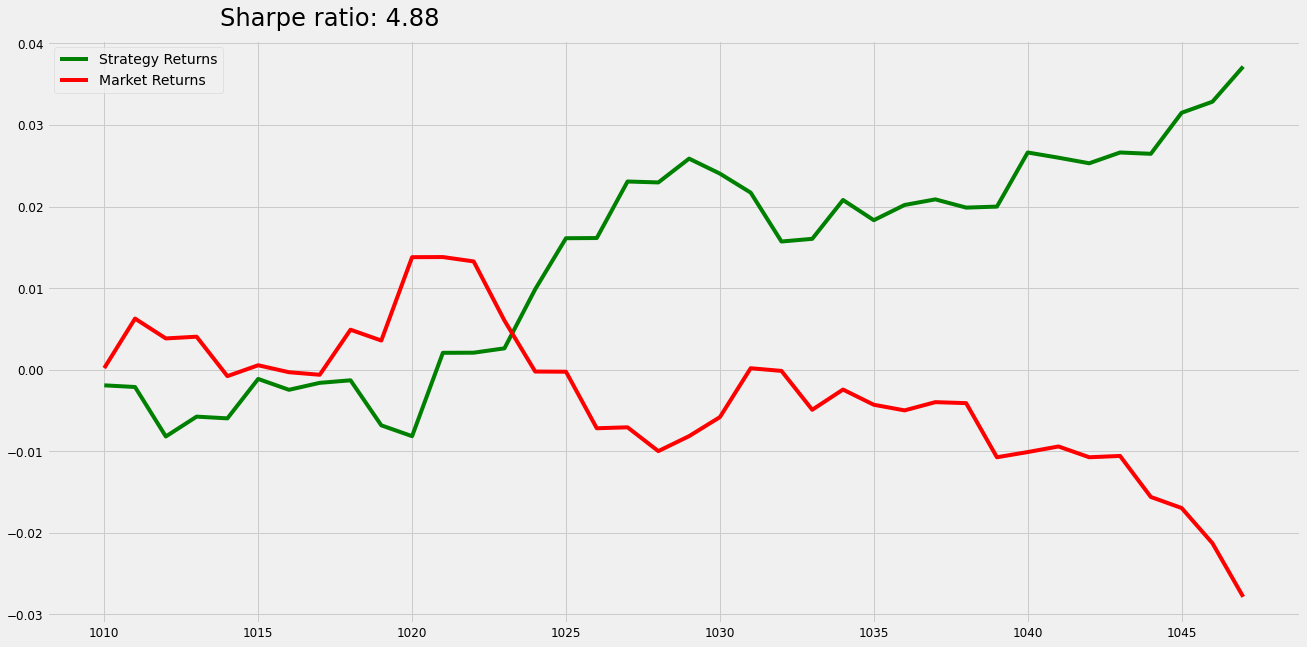

In [17]:
dataset1['str_ret']=dataset1['Pred_Signal']*dataset1['Returns'].shift(1)
dataset1['Strategy_cu_returns']=0
dataset1['market_cu_returns']=0
dataset1.iloc[-p_dataset:,dataset1.columns.get_loc('Strategy_cu_returns')]=np.cumsum(dataset1['str_ret'][-p_dataset:])
dataset1.iloc[-p_dataset:,dataset1.columns.get_loc('market_cu_returns')]=np.cumsum(dataset1['Returns'][-p_dataset:])
sharpe=(dataset1['Strategy_cu_returns'].iloc[-1]
        -dataset1['market_cu_returns'].iloc[-1])/np.nanstd(dataset1['Strategy_cu_returns'][-p_dataset:])
#Plotting---------------------------------------------------------------------------------------------------------------
rcParams['figure.figsize']=20,10
plt.plot(dataset1['Strategy_cu_returns'][-p_dataset:],color='g',label='Strategy Returns')
plt.plot(dataset1['market_cu_returns'][-p_dataset:],color='r',label='Market Returns')
plt.figtext(0.2,0.9,s='Sharpe ratio: %.2f' %sharpe,fontsize=('xx-large'))
plt.legend(loc='best')
plt.show()